# 1. Crecimiento de la bacteria _V. natriegens_ en medio de cultivo con pH de 7.85

En algún experimento se recopilarón los siguientes datos del crecimiento de la población de bacterias.
Donde "Índice de Tiempo" se refiere a intervalos de 16 minutos.

| Tiempo (minutos) | Índice de Tiempo | Densidad de Población |
|------------------|------------------|-----------------------|
| 0                | 0                | 0.028                 |
| 16               | 1                | 0.047                 |
| 32               | 2                | 0.082                 |
| 48               | 3                | 0.141                 |
| 64               | 4                | 0.240                 |
| 80               | 5                | 0.381                 |

### $\mathrm{i}$) Repitase el análisis de datos visto en clases para esta tabla.

#### Notación
$t$ para denotar el intervalo de tiempo de 16 minutos en que se mide la densidad de población $B_t$; dónde $B_t$ se mide al inicio del intervalo. Así $B_t$ ha sido medido a los $t\times 16$ minutos.

#### Gráficas

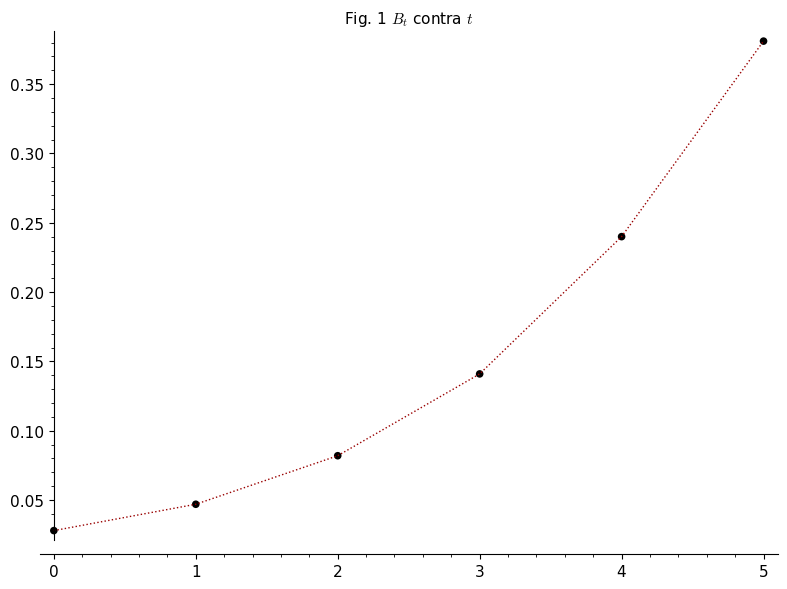

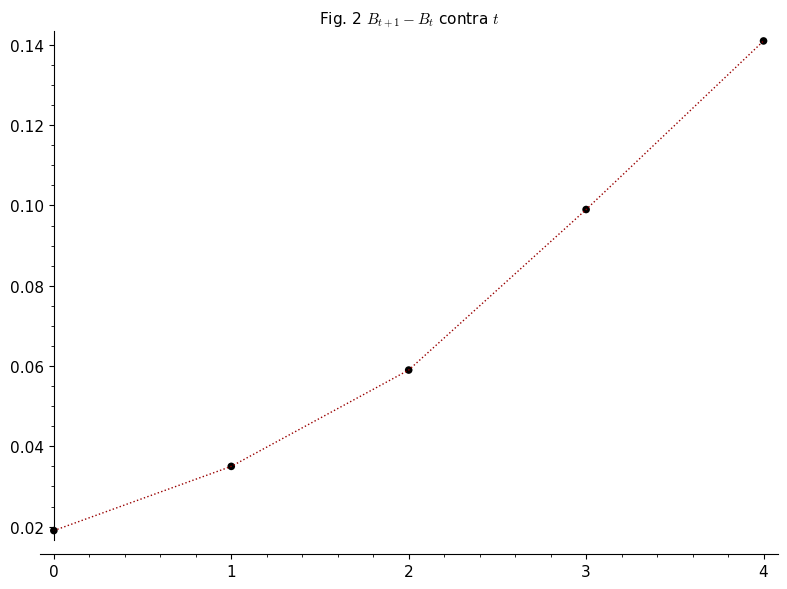

In [151]:
def dotted(tabla, *args):
    return plot(points(tabla, rgbcolor=(0,0,0), pointsize=30)+
                list_plot(tabla, plotjoined=True, linestyle=":", rgbcolor=(0.6,0,0)))

def cshow(ctabla, ctitle=None, cticks=None, #ticks es un arreglo con el tamaño de escalón de cada eje
          cfigsize=8, cfontsize=11, *args): 
    return show(dotted(tabla=ctabla), title=ctitle, ticks=cticks,
                figsize=cfigsize, fontsize=cfontsize) 
    
Tabla1 = [(0, 0.028),
        (1, 0.047),
        (2, 0.082),
        (3, 0.141),
        (4, 0.240),
        (5, 0.381)]

Tabla2 = list()
for t in range(5):
    Tabla2.append( (t, Tabla1[t+1][1]-Tabla1[t][1]) )
    
cshow(Tabla1, ctitle="Fig. 1 $B_t$ contra $t$", cticks = [1,None])
cshow(Tabla2, ctitle="Fig. 2 $B_{t+1}-B_t$ contra $t$", cticks = [1,None])

Se observa de la figura 1 que cada vez está más separado un valor de otro, con lo que el crecimiento se hace cada vez mayor. Pero de la figura 2 se observa que el crecimiento $B_{t+1}-B_t$ tampoco es lineal sobre el tiempo. Cada vez su taza de crecimiento, representada por la pendiente de la recta aumenta en $t$ (a excepción de con el último punto). 

Como $B_t$ también aumenta con el tiempo, se piensa que podría relacionarse mejor (linealmente) con $B_{t+1}-B_{t}$ que $t$. Dado que ambas son cantidades que aumentan con el tiempo.

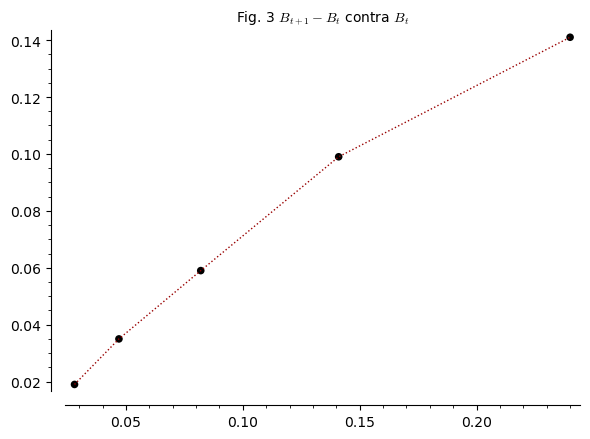

In [131]:
Tabla3 = list()
for t in range(5):
    Tabla3.append( (Tabla1[t][1], Tabla2[t][1]) )
    
dotted(Tabla3, "Fig. 3 $B_{t+1}-B_t$ contra $B_t$")

Se puede observar fácilmente que el cambio en los primeros cuatro puntos de la figura 3 tienen pendientes más similares que en las otras figuras. Por lo que al menos cuatro de los cinco puntos se ajustan bien a un modelo lineal. Puede ser tanto que el último dato sea error de medición, como que después del tiempo $t=3$ (48 minutos en adelante) otro modelo describa mejor el fenómeno. En el primer caso, solo perjudica tomar en cuenta el último punto. 

Pero si el dato está bien medido, entonces la información que en este caso brinda el último punto es que el modelo lineal empieza a sobreestimar el crecimiento de la densidad de población.

Para $t=0,1,2,3$: Sea $\Delta B_t = B_{t+1}-B_t$. Entonces la pendiente $k_t$ de la recta que conecta
$(B_t,\Delta B_t)$ con $(B_{t+1}, \Delta B_{t+1})$ es 
$$\frac{\Delta B_{t+1} - \Delta B_t}{B_{t+1} - B_t} = \frac{\Delta B_{t+1}-\Delta B_t}{\Delta B_t}.$$
O lo que es lo mismo $$k_t = \frac{\Delta B_{t+1}}{\Delta B_t}-1.$$

| $t$ | $B_t$ | $\Delta B_t$ | $k_t$  |
|-----|-------|---------------|--------|
| 0   | 0.028 | 0.019         | 0.842  |
| 1   | 0.047 | 0.035         | 0.686  |
| 2   | 0.082 | 0.059         | 0.678  |
| 3   | 0.141 | 0.099         | 0.424  |
| 4   | 0.240 | 0.141         |        |
| 5   | 0.381 |               |        |

##### Figura 4. 

In [182]:
lista_k = list()
for t in range(4):
    lista_k.append(Tabla3[t+1][1]/Tabla3[t][1]-1)

#promedio sin ultimo elemento    
k1 = (sum(lista_k)-lista_k[len(lista_k)-1])/(len(lista_k)-1); print("k_1 = ",k1) 
#promedio con ultimo elemento
k2 = sum(lista_k)/len(lista_k); print("k_2 = ", k2)
#promedio con peso mixto "a ojo"
k3  = 0.25*lista_k[0]                 # <- 25%
k3 += 0.625/2*(lista_k[1]+lista_k[2]) # <- 62.5%
k3 += 0.125*lista_k[3]                # <- 12.5%
print("k_3 = ", k3)

k_1 =  0.735261883522365
k_2 =  0.657507018702380
k_3 =  0.689706739885152


De la tabla de la tabla de la figura 4 se tiene que el promedio de las pendientes tomando en cuenta los tres primeros puntos es $k_1=0.735$. Consideremos también $k_2=0.658$ el promedio de las pendientes con todos los puntos para comparar como se ajustan los modelos a los datos. 

#### Ecuación Dinámica
Por ahora usaremos $\hat B_t$ para referirnos a la aproximación del valor $B_t$ dado por un modelo lineal. $k$ se refiere a cualquier pendiente de la recta de este modelo (recta que aproxima los datos de la figura 3). De manera que la ecuación de la recta será descrita por una ecuación en terminos de $y = \Delta \hat B_t$ y $x = \hat B_t$. Si esta pasa por $(a,b)$ tenemos para $t\geq 0$
$$\Delta \hat B_t - b = k (\hat B_t - a).$$
O también
$$\hat B_{t+1} = (1+k)\hat B_t +b-ka.$$

De manera que lo único que impediría que el modelo lineal de la figura 3 sea una recta que pase por el origen es que $b-ka$ sea significativamente alejado de 0. Sin embargo también se podría encontrar una solución para la ecuación dinámica anterior. Hágase $K = 1+k$ y $C = b-ka$ en la ecuación anterior:

$$\hat B_{t+1} = K\hat B_t +C.$$
Para $n = 1,2,\ldots$
$$
    \hat B_n = K \hat B_{n-1}+C = K \left(K \hat B_{n-2} +C\right)+C = K^2 \hat B_{n-2}+KC+C = \ldots \\
    = K^n \hat B_0+ C\sum^{n-1}_{j=0}K^j.
$$
Si $K\neq 1$, (que pasa solo cuando $k=0$, y no estamos considerando valores tan bajos)
$$
    \hat B_n = K^n \hat B_0+ C\frac{1-K^n}{1-K}.
$$
Sustituyendo de vuelta $k$, $b$ y $a$
$$
    \hat B_n = (1+k)^n \hat B_0 +(b-ka) \frac{(1+k)^n-1}{k}.
$$

La ecuación es
$$
    B_{t+1}-B_t = k B_t,
$$
o equivalentemente,
$$
    B_{t+1} = (1+k) B_t.
$$

Dado $B_0$ y $k$, entonces el valor de $B_n$ en el modelo es conocido:
$$
    B_n = (1+k)B_{n-1} = (1+k) \left((1+k)B_{n-2}\right) = (1+k)^2 B_{n-2} = \ldots = (1+k)^n B_0, \\
    B_n = (1+k)^n B_0.
$$
Esta es la solución de la ecuación dinámica.

#### Grafica de Soluciones

In [ ]:
# Modelo con pendiente k
m1 = lambda x: 

##### Descripción del Experimento

El biólogo propone que en un intervalo de tiempo constante (en este caso 16 minutos), una fracción de la población de bacterias se "divide"; como resultado de tal proceso llamado fisión binaria, una bacteria se convierte en dos bacterias. Tal supuesto será altamente preciso solo durante que las condiciones del experimento se mantengan lo suficientemente similares. Entre estas condiciones conocidas por el biólogo, que la densidad de población se mantenga bajo cierto nivel y que haya abundantes nutrientes. Con estos supuestos sobre el fénomeno, usamos la siguiente notación: